# Test Feature Vectors

Test the image retrieval results of several feature vectors compared with L2 distance.

In [1]:
from PIL import Image
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import random
import sys
sys.path.append('..')

from src.search import Search, CombinedSearch
from src.features import AkiwiFeatureGenerator, ResnetFeatureGenerator
from src import image_utils

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load data

In [2]:
folder_gens = {'akiwi_50': AkiwiFeatureGenerator(50), 
               'akiwi_64': AkiwiFeatureGenerator(64),
               'akiwi_114': AkiwiFeatureGenerator(114),
               'resnet': ResnetFeatureGenerator(),
               'resnet_retrained': ResnetFeatureGenerator('../data/models/resnet152_retrained.pth')
              }

## Products
Load features for product images.

In [3]:
product_imgs = '../data/images/fashion/dresses/'
product_feats_root = '../data/features/fashion/dresses/'

In [4]:
searches = {}
for dir_name, gen in folder_gens.items():
    searches[dir_name] = Search(product_imgs, os.path.join(product_feats_root, dir_name), gen)

Loading features from: ../data/features/fashion/dresses/akiwi_50
Loading features from: ../data/features/fashion/dresses/akiwi_64
Loading features from: ../data/features/fashion/dresses/akiwi_114
Loading features from: ../data/features/fashion/dresses/resnet
Loading features from: ../data/features/fashion/dresses/resnet_retrained


In [5]:
searches['resnet+akiwi50 (1:1)'] = CombinedSearch([searches['akiwi_50'], searches['resnet']], factors=[1, 1])
searches['resnet+akiwi50 (1:2)'] = CombinedSearch([searches['akiwi_50'], searches['resnet']], factors=[2, 1])
searches['resnet+akiwi50 (1:3)'] = CombinedSearch([searches['akiwi_50'], searches['resnet']], factors=[3, 1])

## Models
Load features for model images.

In [6]:
model_imgs = '../data/images/fashion_models/dresses_clustered/'
model_feats_root = '../data/features/fashion_models/dresses/'

In [7]:
searches_m = {}
for dir_name, gen in folder_gens.items():
    searches_m[dir_name] = Search(model_imgs, os.path.join(model_feats_root, dir_name), gen)

Loading features from: ../data/features/fashion_models/dresses/akiwi_50
Loading features from: ../data/features/fashion_models/dresses/akiwi_64
Loading features from: ../data/features/fashion_models/dresses/akiwi_114
Loading features from: ../data/features/fashion_models/dresses/resnet
Loading features from: ../data/features/fashion_models/dresses/resnet_retrained


In [8]:
searches_m['resnet+akiwi50 (1:1)'] = CombinedSearch([searches_m['akiwi_50'], searches_m['resnet']], factors=[1, 1])
searches_m['resnet+akiwi50 (1:2)'] = CombinedSearch([searches_m['akiwi_50'], searches_m['resnet']], factors=[2, 1])
searches_m['resnet+akiwi50 (1:3)'] = CombinedSearch([searches_m['akiwi_50'], searches_m['resnet']], factors=[3, 1])

# Plot Similar Images

In [9]:
def plot_similar_imgs(imgs, dist, title, input_img=None, save_path=None):
    

    num_imgs = len(imgs)+1 if input_img else len(imgs)
    fig, axarr = plt.subplots(1, num_imgs, figsize=(num_imgs*3, 4))
    
    axidx = 0
    
    if input_img:
        input_img = Image.open(input_img)
        input_img = image_utils.process_image(input_img)
        input_img = input_img.crop((40, 0, 216, 256))
        ax = axarr[0]
        ax.set_xticks([])
        ax.set_yticks([])
        for s in ax.spines.keys():
            ax.spines[s].set_visible(False)
        ax.imshow(input_img)
        axidx = 1
    
    for i, img_path in enumerate(imgs):
        img = Image.open(img_path)
        img = img.crop((40, 0, 216, 256))
        ax = axarr[i+axidx]
        ax.set_xlabel(round(dist[i], 2), fontsize=22)
        ax.set_xticks([])
        ax.set_yticks([])
        
        for s in ax.spines.keys():
            ax.spines[s].set_visible(False)
        ax.imshow(img)
    
    fig.suptitle(title, fontsize=28)
    if save_path is not None:
        plt.savefig(os.path.join('./test_features_results/', save_path))
        
    plt.show()

In [10]:
def plot_all(img_path, searches, num_imgs=6, input_img=None, metric='l2'):
    for search_name, search in searches.items():
        imgs, dist = search.get_similar_images_with_distances(Image.open(img_path), num_imgs, metric=metric)
        plot_similar_imgs(imgs, dist, search_name, input_img=input_img)

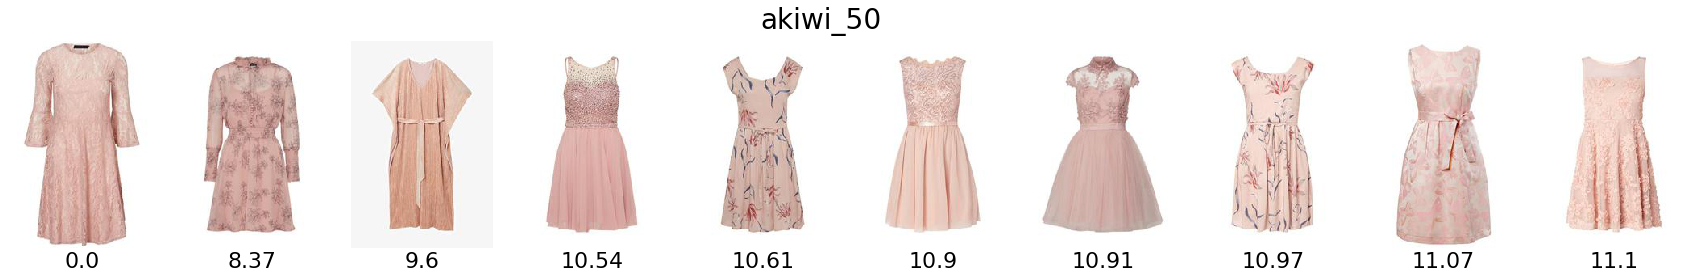

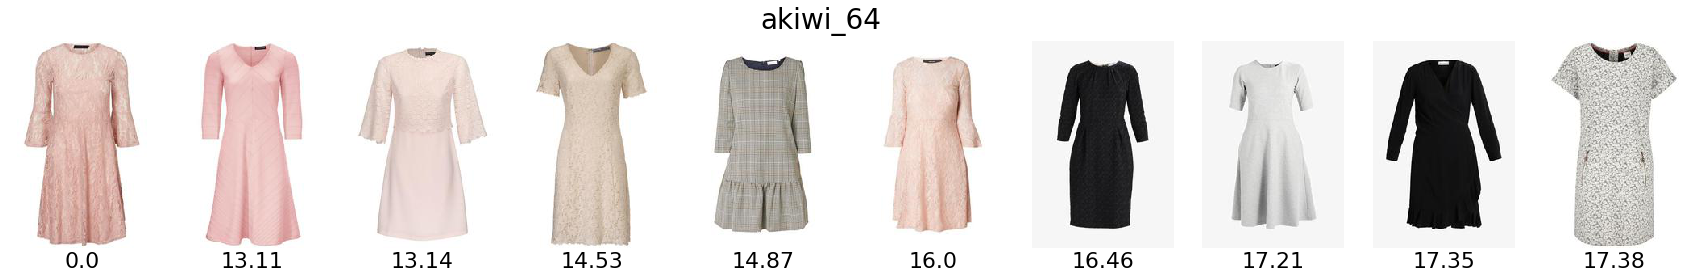

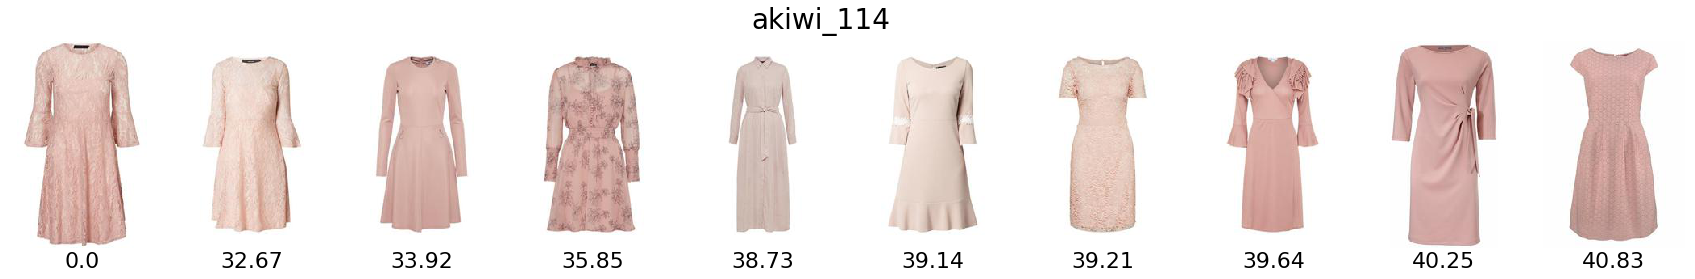

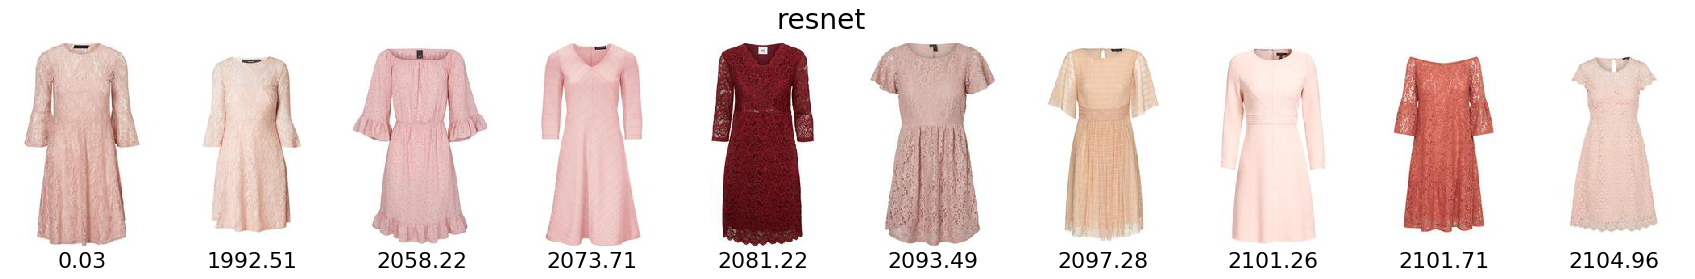

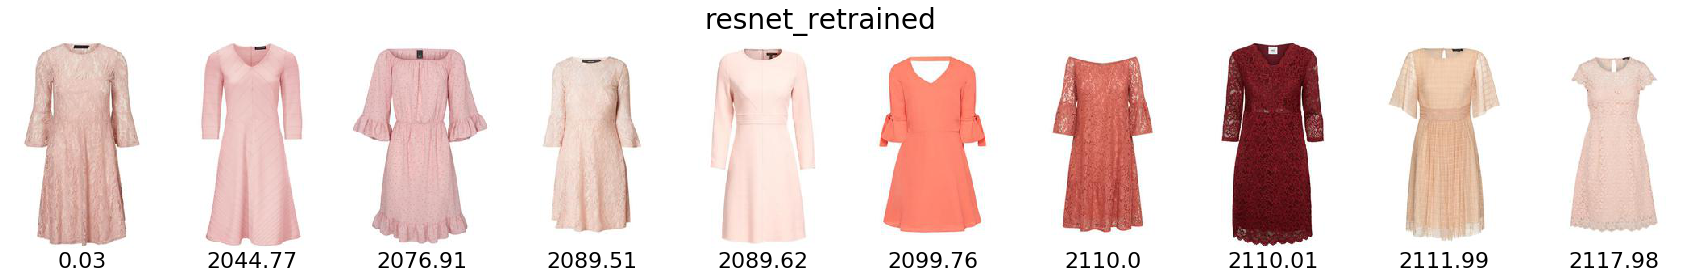

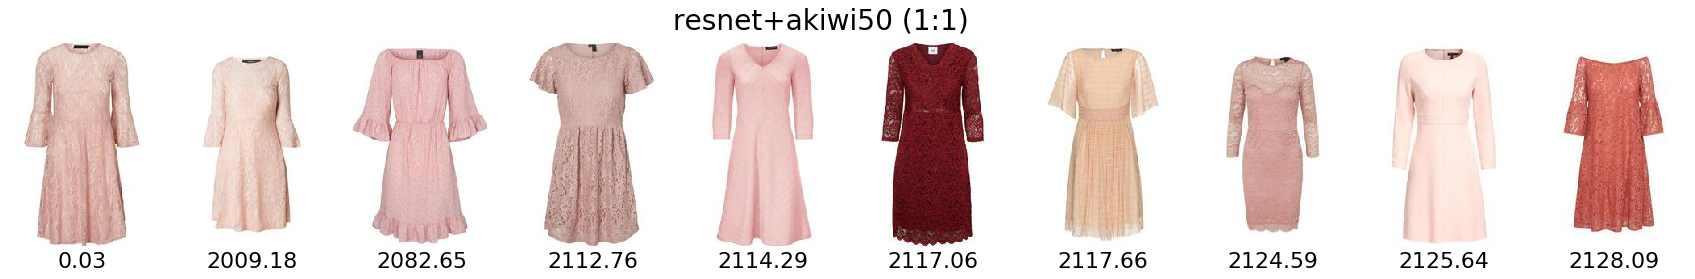

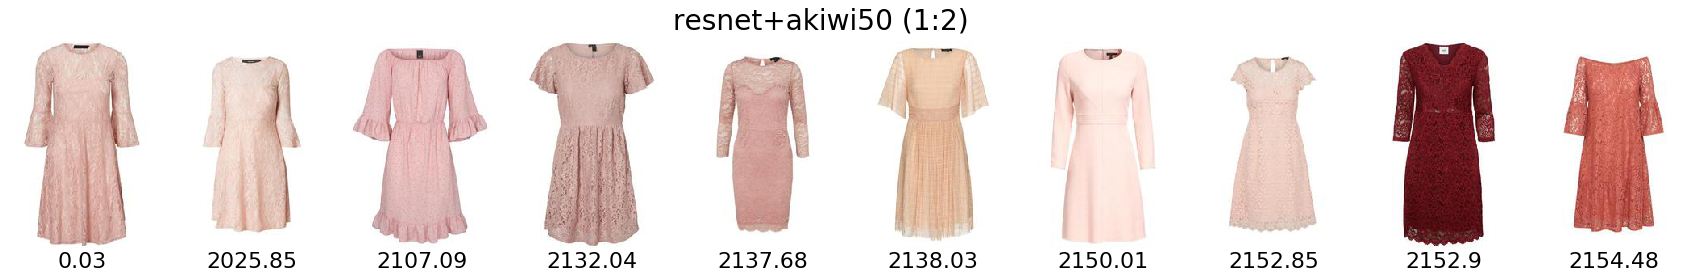

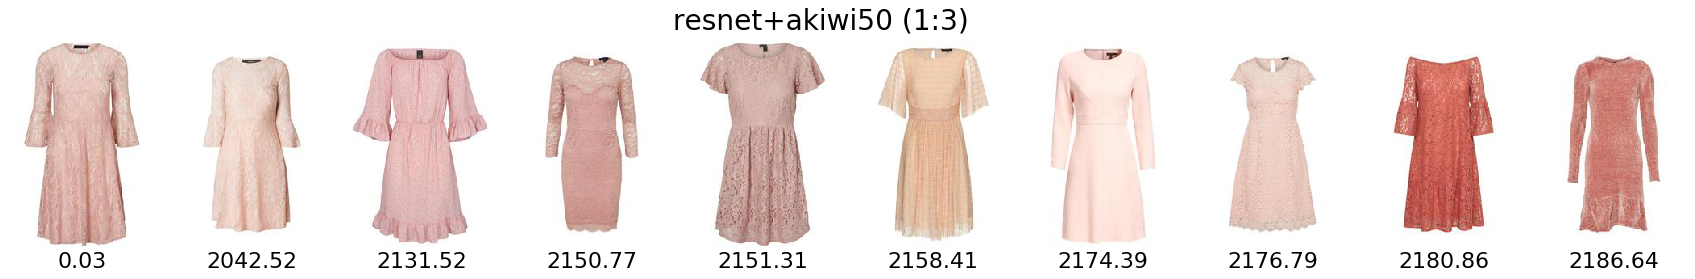

In [11]:
plot_all('../data/images/fashion/dresses/5713733606269.jpg', searches, 10, metric='l1')